<a href="https://colab.research.google.com/github/AmmarMalik93/MachineLearningSabKayLiey/blob/master/MLinBioinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm
#plt.style.use('seaborn')
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)


In [ ]:
data = loadmat('drive/My Drive/Colab Notebooks/baseline.mat')
Xorig = data['X']
Yorig = data['Y']
print(Xorig.shape)
print(Yorig.shape)

(628, 50)
(628, 1)


In [ ]:
Y = Yorig[Yorig!=2]
X = Xorig[np.where(Yorig!=2)[0],:]
print(X.shape, Y.shape)

(323, 50) (323,)


In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
#\\\    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
#    AdaBoostClassifier(),
    GaussianNB(),
#    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]



In [ ]:
Xn = StandardScaler().fit_transform(X)

In [ ]:
skf = StratifiedKFold(n_splits=10)
ACC = np.empty((len(classifiers),10))
TN = np.empty_like(ACC)
FP = np.empty_like(ACC)
FN = np.empty_like(ACC)
TP = np.empty_like(ACC)

y = 0
for train_index, test_index in skf.split(Xn, Y):
  X_train, X_test = Xn[train_index], Xn[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  x = 0
  for clf in classifiers:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TN[x,y] = tn
        FP[x,y] = fp
        FN[x,y] = fn
        TP[x,y] = tp 
        x += 1        
  y += 1

In [ ]:
TN = TN.sum(axis=1)
FP = FP.sum(axis=1)
FN = FN.sum(axis=1)
TP = TP.sum(axis=1)

In [ ]:
ACC = (TP+TN)/(TP+TN+FP+FN)
TPR = (TP)/(TP+FN) # Sensitivity, Recall, True Positive Rate
TNR = (TN)/(TN+FP) # Specificity, True Negative Rate
PPV = (TP)/(TP+FP) # Precision, Positive Product Value
F1 = 2*(PPV*TPR)/(PPV+TPR)
print(ACC)
print(TPR)
print(TNR)
print(PPV)
print(F1)

[0.81114551 0.87616099 0.83591331 0.76160991 0.85758514 0.77399381
 0.85448916]
[0.61654135 0.79699248 0.7518797  0.58646617 0.78195489 0.69924812
 0.79699248]
[0.94736842 0.93157895 0.89473684 0.88421053 0.91052632 0.82631579
 0.89473684]
[0.89130435 0.8907563  0.83333333 0.78       0.85950413 0.73809524
 0.84126984]
[0.72888889 0.84126984 0.79051383 0.6695279  0.81889764 0.71814672
 0.81853282]


In [ ]:
x = ['KNN', 'SVM', 'DT', 'RF', 'MLP', 'NB', 'LR']

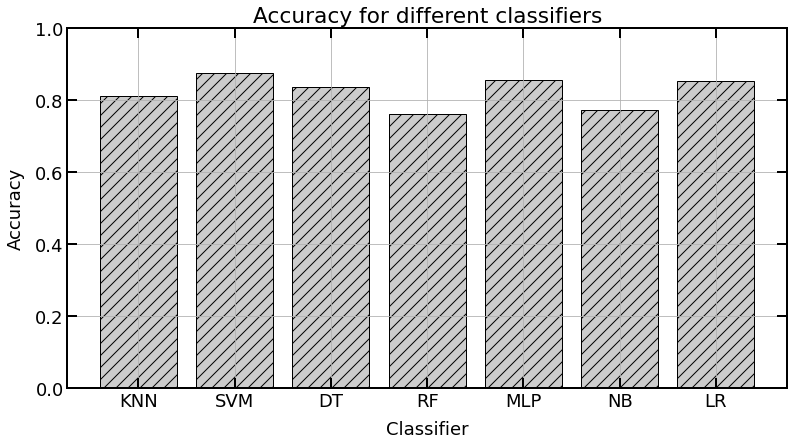

In [ ]:
x_pos = [i for i, _ in enumerate(classifiers)]

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0, 0, 1, 1])
# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='off')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='off')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='off')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='off')

ax.bar(x_pos, ACC, color='0.8', edgecolor='black', hatch='//')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title("Accuracy for different classifiers")
ax.grid(which='major', axis='both')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_ylim(0.0, 1.0)
plt.show()

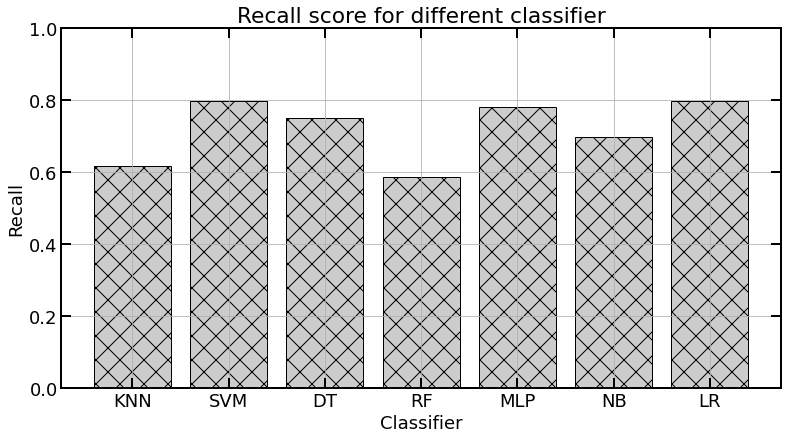

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0, 0, 1, 1])
# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='off')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='off')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='off')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='off')

ax.bar(x_pos, TPR, color='0.8', edgecolor='black', hatch='x')
ax.set_xlabel("Classifier")
ax.set_ylabel("Recall")
ax.set_title("Recall score for different classifiers")
ax.grid(which='major', axis='both')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_ylim(0.0, 1.0)
plt.show()

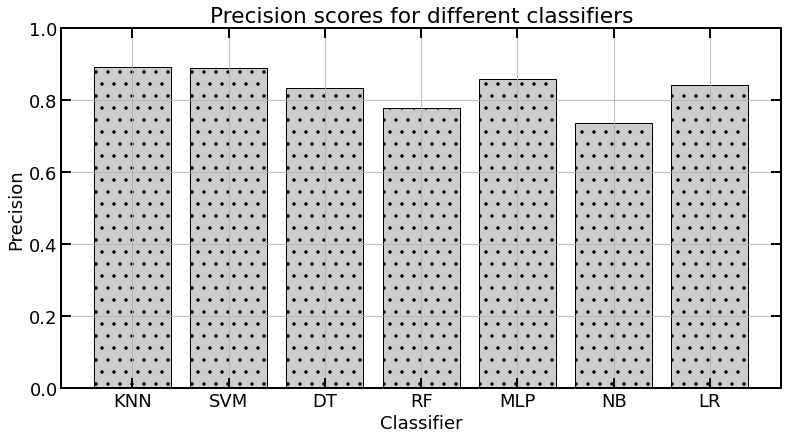

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0, 0, 1, 1])
# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='off')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='off')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='off')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='off')

ax.bar(x_pos, PPV, color='0.8', edgecolor='black', hatch='.')
ax.set_xlabel("Classifier")
ax.set_ylabel("Precision")
ax.set_title("Precision scores for different classifiers")
ax.grid(which='major', axis='both')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_ylim(0.0, 1.0)
plt.show()


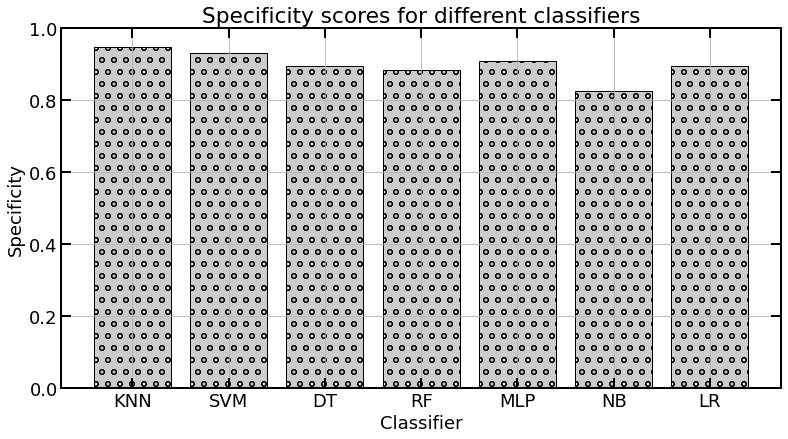

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0, 0, 1, 1])
# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='off')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='off')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='off')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='off')

ax.bar(x_pos, TNR, color='0.8', edgecolor='black', hatch='o')
ax.set_xlabel("Classifier")
ax.set_ylabel("Specificity")
ax.set_title("Specificity scores for different classifiers")
ax.grid(which='major', axis='both')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_ylim(0.0, 1.0)
plt.show()

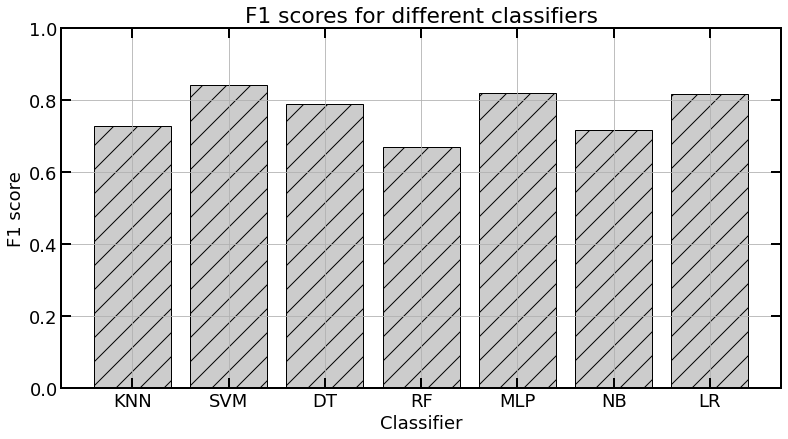

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0, 0, 1, 1])
# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='off')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='off')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='off')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='off')

ax.bar(x_pos, F1, color='0.8', edgecolor='black', hatch='/')
ax.set_xlabel("Classifier")
ax.set_ylabel("F1 score")
ax.set_title("F1 scores for different classifiers")
ax.grid(which='major', axis='both')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_ylim(0.0, 1.0)
plt.show()
